In [1]:
import numpy as np
import pandas as pd
import os
from scipy.integrate import quad_vec
import matplotlib.pyplot as plt
sndata = pd.read_csv('./Data/parsonage.txt', sep = ' ', engine='python')


# 1. Setting priors

\# Omega_radiation calculation

$$\epsilon_{rad,0} = \cfrac{4}{c}\sigma T^4 \approx 2.5\times 10^{-15} \mathrm{J/m^3}$$
$$\epsilon_{crit,0} = \cfrac{3c^2H_0^2}{8\pi G} = \cfrac{3c^2h^2(100\mathrm{km/s/Mpc})^2}{8\pi G}\approx 1.7\times 10^{-9}h^2 \mathrm{J/m^3} $$ 
$$\Omega_{rad,0} = \cfrac{\epsilon_{rad,0}}{\epsilon_{crit,0}} \approx 1.48\times 10^{-6}h^{-2}$$

We can ignore the energy density of radiation since it's small.

The Age of the universe would be come into account for developing prior.

$$t_{Age} >= 15 \text{Gyr}$$

There will be two models to be considered as a candidate for the Universe.

1. Flat LCDM
2. Curved LCDM

In [2]:
import astropy.units as u

# Unit conversion of the Hubble constant from km/s/Mpc to Gyr^-1
result = (1 * u.km / u.s/u.Mpc)
result2 = result.to(1/u.Gyr)
print(result2)
from astropy.constants import c, G

# Define H0 in terms of h (dimensionless Hubble constant)
# H0 = 100 * h km/s/Mpc
# We want the result in units of h^2 J/m^3, so we calculate the part without h^2 first.
H100 = 100 * u.km / u.s / u.Mpc

# Critical energy density formula: 3 * c^2 * H0^2 / (8 * pi * G)
# We calculate epsilon_crit / h^2
epsilon_crit_div_h2 = (3 * c**2 * H100**2 / (8 * np.pi * G))

# Convert to J/m^3
epsilon_crit_div_h2_J_per_m3 = epsilon_crit_div_h2.to(u.J / u.m**3)
erad = 2.5*10**-15 * u.J/u.m**3
Omega_rad = erad / epsilon_crit_div_h2_J_per_m3
print(f"Critical energy density = {epsilon_crit_div_h2_J_per_m3} h^2")
print(f"Omega_rad = {Omega_rad}")

0.0010227121650456948 1 / Gyr
Critical energy density = 1.6881692556555721e-09 J / m3 h^2
Omega_rad = 1.4808941648621407e-06


In [10]:

# Get the Hubble constant from Planck 2018 cosmology (km/s/Mpc)

# Convert 1/H0 to gigayears

def integrand(z, omegam, omegalamb):
    omega0 = omegam + omegalamb
    y2 = (omegam*(1+z)**3+omegalamb+(1-omega0)*(1+z)**2)
    y = np.sqrt(y2)
    return 1/y
def AgeofUniverse(H0,omegam, omegalamb):
    I = quad_vec(integrand,0,np.inf, args=(omegam, omegalamb))
    H0_Gyr = H0 * 0.0010227121650456948 # Hubble constant in Gyr^-1
    H0_inverse = 1/H0_Gyr # Hubble constant in Gyr^-1
    T = I[0]*H0_inverse # age is in Gyr, 1/H_0 ~ 14.452 Gyr
    return T

## 1-1. Flat LCDM Prior

In [42]:
# Calculate the prior for Flat LCDM
omegam = np.linspace(0.0, 1, 500)
omegalamb = 1.0 - omegam
Hubble0 = np.linspace(0.1,500,1000)
H_Flat, M_Flat = np.meshgrid(Hubble0, omegam)
L_Flat = 1 - M_Flat
prior_flat = np.zeros(M_Flat.shape)
age_flat = AgeofUniverse(H_Flat, M_Flat, L_Flat)
prior_flat[age_flat >= 15] = 1
np.save('prior_flat.npy', prior_flat)

KeyboardInterrupt: 

In [ ]:
prior_flat = np.load('prior_flat.npy')
omegam = np.linspace(0.0, 1, 500)
omegalamb = 1.0 - omegam
Hubble0 = np.linspace(0.1,500,1000)
H_Flat, M_Flat = np.meshgrid(Hubble0, omegam)
H_Flat[np.where((M_Flat >=0.1) & (M_Flat <0.11) & (prior_flat == 1))][-1]
M_Flat[np.where((M_Flat >=0.2) & (M_Flat <0.21) & (prior_flat == 1))][-1]

0.20841683366733466

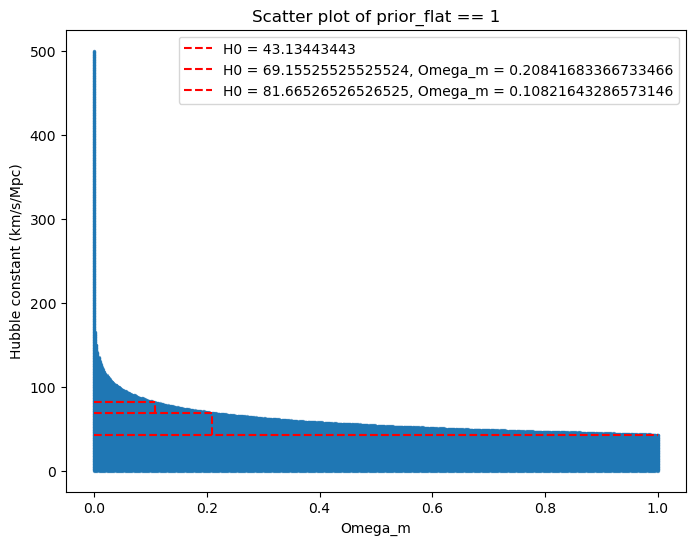

In [ ]:

# Hubble0와 omegam은 prior_flat의 축과 일치해야 합니다.
# prior_flat이 1인 위치의 인덱스를 찾음
idx = np.where(prior_flat == 1)

# x축: omegam, y축: Hubble0
plt.figure(figsize=(8, 6))
plt.scatter(M_Flat[idx], H_Flat[idx], s=2, alpha=0.5)
plt.hlines(y=43.13443443,xmin=0.0, xmax = 1, color='red', linestyle='--', linewidth=1.5, label = 'H0 = 43.13443443')
plt.hlines(y=69.15525525525524, xmin = 0.0, xmax = 0.20841683366733466, color='red', linestyle='--', linewidth=1.5, label = 'H0 = 69.15525525525524, Omega_m = 0.20841683366733466')
plt.vlines(x = 0.20841683366733466, ymin = 43.13443443, ymax = 69.15525525525524, color='red', linestyle='--', linewidth=1.5)
plt.hlines(y=81.66526526526525,xmin = 0.0, xmax =0.10821643286573146,  color='red', linestyle='--', linewidth=1.5, label = 'H0 = 81.66526526526525, Omega_m = 0.10821643286573146')
plt.vlines(x = 0.10821643286573146, ymin = 69.15525525525524, ymax = 81.66526526526525, color='red', linestyle='--', linewidth=1.5)
plt.xlabel('Omega_m')
plt.ylabel('Hubble constant (km/s/Mpc)')
plt.title('Scatter plot of prior_flat == 1')
plt.legend()
plt.show()

Prior_flat1 : 0< Hubble constant < 43.13443443, 0 < Omega_m < 1

Prior_flat2 : 43.13443443 < Hubble constant < 69.15525525525524, 0 < Omega_m < 0.20841683366733466

Prior_flat3 : 69.15525525525524 < Hubble constant < 81.66526526526525, 0 < Omega_m < 0.10821643286573146

## 1-2. Curved LCDM prior

In [4]:
from scipy.optimize import fsolve

omegam = np.linspace(0.0, 20, 100)
omegalamb = np.linspace(-3, 3, 100)

def integrand(z, parm):
    Ez2 = (parm[0] * (1+z)**3 + parm[1] + (1-parm[0]-parm[1]) * (1+z)**2)
    if Ez2 <= 0:
        Ez = np.sqrt(-Ez2)
    else:
        Ez = np.sqrt(Ez2)
    return Ez2

def solve_for_parm(p1, p2):
    parm = [p1, p2]
    try:
        sol = fsolve(integrand, sndata['zcmb'].max(), args=(parm,))
        return sol[0]
    except:
        return np.nan

# vectorize로 함수를 배열 처리 가능하게 만들기
solve_vectorized = np.vectorize(solve_for_parm)

M,L = np.meshgrid(omegam, omegalamb)
results = solve_vectorized(M,L)

/var/folders/h8/5hxv73fd07d033x49543ghl00000gn/T/ipykernel_29078/2226932826.py:17: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  sol = fsolve(integrand, sndata['zcmb'].max(), args=(parm,))
/var/folders/h8/5hxv73fd07d033x49543ghl00000gn/T/ipykernel_29078/2226932826.py:17: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  sol = fsolve(integrand, sndata['zcmb'].max(), args=(parm,))


In [5]:
resultind = np.zeros_like(results)
resultind[np.isnan(results) | (results >0)] = 1

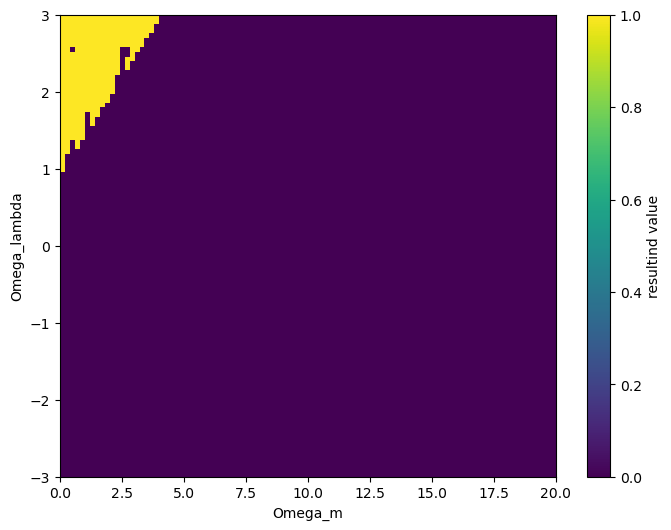

In [8]:
plt.figure(figsize=(8, 6))
plt.imshow(resultind, cmap='viridis', aspect='auto', origin='lower',
           extent=[omegam[0], omegam[-1], omegalamb[0], omegalamb[-1]])
plt.colorbar(label='resultind value')
plt.xlabel('Omega_m')
plt.ylabel('Omega_lambda')
plt.xlim(0, 20)
plt.ylim(-3, 3)
plt.savefig('./Figs/2D_prior.png', dpi=300)
plt.show()
# Omegam = [0,20], Omegalam = [-3,1]까지가 첫번째 prior!

In [11]:
# Calculate the prior for Curved LCDM
omegam = np.linspace(0.0, 20, 100)
omegalamb = np.linspace(-3, 3, 100)
Hubble0 = np.linspace(0.1,80,100)
H, M, L = np.meshgrid(Hubble0, omegam, omegalamb)
prior_curved = np.zeros(M.shape)
age = AgeofUniverse(H,M, L)
prior_curved[age >= 15] = 1
np.save('prior_curved.npy', prior_curved)

/var/folders/h8/5hxv73fd07d033x49543ghl00000gn/T/ipykernel_29078/1870852958.py:8: RuntimeWarning: invalid value encountered in sqrt
  y = np.sqrt(y2)


In [12]:
omegam = np.linspace(0.0, 20, 100)
omegalamb = np.linspace(-3, 3, 100)
Hubble0 = np.linspace(0.1,80,100)
H, M, L = np.meshgrid(Hubble0, omegam, omegalamb)
prior_curved = np.load('prior_curved.npy')

Prior = 0 < Hubble0 < 38.032323232323236


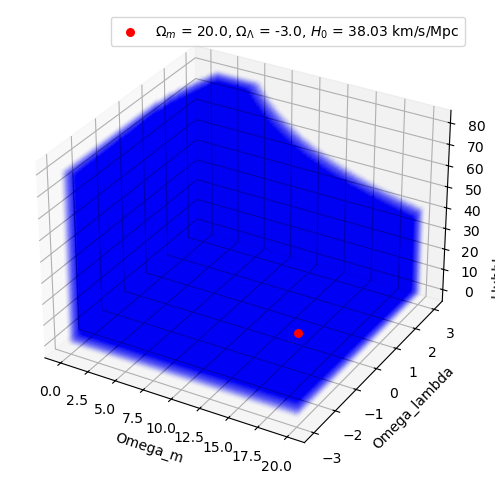

In [18]:
# ...existing code...
idx = np.where(prior_curved == 1)
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d', computed_zorder=False)

# 파란 점(전체 prior)을 먼저 plot (맨 뒤로)
blue = ax.scatter(M[idx], L[idx], H[idx], c='b', marker='o', alpha=0.01, zorder=1)

# 조건별로 노란/빨간 점을 나중에 plot (맨 앞으로)
red_points = []
yellow_points = []
"""
cond1 = np.where((M == 0) & (L == 3) & (prior_curved == 1))
if cond1[0].size > 0:
    red_points.append(ax.scatter(M[cond1][-1], L[cond1][-1], H[cond1][-1], color='red', s=30, zorder=10))

cond2 = np.where((M ==20) & (L == 3) & (prior_curved == 1))
if cond2[0].size > 0:
    red_points.append(ax.scatter(M[cond2][-1], L[cond2][-1], H[cond2][-1], color='red', s=30, zorder=10))
"""
cond3 = np.where((M == 20) & (L == -3) & (prior_curved == 1))
if cond3[0].size > 0:
    ax.scatter(M[cond3][-1], L[cond3][-1], H[cond3][-1], color='red', s=30, zorder=10, label = rf'$\Omega_m$ = {M[cond3][-1]}, $\Omega_\Lambda$ = {L[cond3][-1]}, $H_0$ = {H[cond3][-1]:.2f} km/s/Mpc')
"""
cond4 = np.where((M >= 0.2) & (M < 0.22) &(L == 1)& (prior_curved == 1))
if cond4[0].size > 0:
    yellow_points.append(ax.scatter(M[cond4][-1], L[cond4][-1], H[cond4][-1], color='yellow', s=30, zorder=20)) 
cond5 = np.where((H >= 75.23) & (H < 75.33) &(M == 0)& (prior_curved == 1))
if cond5[0].size > 0:
    yellow_points.append(ax.scatter(M[cond5][0], L[cond5][0], H[cond5][0], color='yellow', s=30, zorder=20))
    
cond6 = np.where((M >= 0.1) & (M < 0.11) &(L == 1)& (prior_curved == 1))
if cond6[0].size > 0:
    yellow_points.append(ax.scatter(M[cond6][-1], L[cond6][-1], H[cond6][-1], color='green', s=30, zorder=20))
cond7 = np.where((H > 89.26052104) & (M == 0) & (prior_curved == 1))
if cond7[0].size > 0:
    yellow_points.append(ax.scatter(M[cond7][0], L[cond7][0], H[cond7][0], color='green', s=30, zorder=20))

# zorder를 강제로 재할당 (matplotlib은 3D에서 zorder가 완벽히 동작하지 않을 수 있으나, 이 방식이 최선)
"""
for artist in red_points:
    artist.set_zorder(10)
#for artist in yellow_points:
#    artist.set_zorder(20)
blue.set_zorder(1)

ax.set_xlabel('Omega_m')
ax.set_ylabel('Omega_lambda')
ax.set_zlabel('Hubble constant (km/s/Mpc)')
print(f'Prior = 0 < Hubble0 < {H[cond3][-1]}')
ax.legend()
#print(f'Prior_2 = {H[cond1][-1]} < Hubble0 < {H[cond4][-1]}, 0 < Omega_m < {M[cond4][-1]}, {L[cond5][0]} < Omegalamb < {L[cond4][-1]}')
#print(f'Prior_3 = {H[cond4][-1]} < Hubble0 < {H[cond6][-1]}, 0 < Omega_m < {M[cond6][-1]}, {L[cond7][0]} < Omegalamb < {L[cond6][-1]}')""
plt.show()

In [14]:
H[cond3][-1]

38.032323232323236

## 1-3 Prior from GW data

We will use GW data, which is relatively in small redshifts, to get a rough estimate of the prior.

To do so, we will use an approximate relaltion for the current proper distance & calculate luminosity distance with it.

$$ d_p(t_0) \approx \cfrac{cz}{H_0}$$

In [ ]:
# GW data
z_GW = np.array([0.0101,0.0067])
dl_GW = np.array([150.9, 95.4]) # Mpc
ddl_GW = np.array([14,14.5])

In [ ]:
def propdist_approx(z,H0):
    # Approximate the luminosity distance for small redshifts
    c = 299792.458  # speed of light in km/s
    dp = c*z/H0
    dl = (1+z)*dp
    return dl

In [ ]:
from scipy.optimize import curve_fit

gwpopt, gwpcov = curve_fit(propdist_approx, z_GW, dl_GW, sigma=ddl_GW, absolute_sigma=True)
print("Flat LCDM fit parameters (H0, omegam):", gwpopt)
print("Flat LCDM fit covariance matrix:\n", gwpcov)

Flat LCDM fit parameters (H0, omegam): [20.52832336]
Flat LCDM fit covariance matrix:
 [[2.64373053]]


Prior_final : 4.66594018 < H0 < 36.39070654 $$({H0_{avg}} \pm 6\sigma_{H0})$$